In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import time
import json

%matplotlib inline
from IPython import display

from hill_climbing_agent import HC_AGENT

In [2]:
env = gym.make("CartPole-v0")
env.seed(42)
print("State Space : ", env.observation_space)
print("Action Space : ", env.action_space)

State Space :  Box(4,)
Action Space :  Discrete(2)


In [3]:
def plot_scores(scores, rolling_mean, save_fig=False, filename=None):
    plt.plot(scores, label="Scores")
    plt.plot(rolling_mean, label="Rolling Mean")
    plt.xlabel("Episode")
    plt.ylabel("Score")
    plt.legend()
    if save_fig:
        plt.savefig(filename+'.png')
    plt.show()

In [4]:
def save_model(agent, checkpoint_name):
    np.save(checkpoint_name, agent.policy.weights)

In [5]:
env_state_size = env.observation_space.shape[0]
env_action_size = env.action_space.n

E-110 --> Score : 200.00	Rolling Mean : 194.10	Max Score : 200.00	Time : 0.1 secs


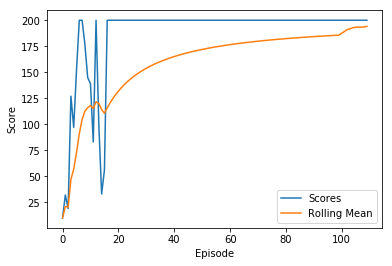

Environment Solved in 116 episodes !!


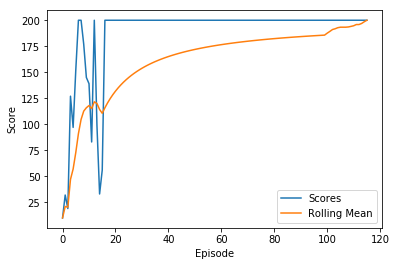

In [6]:
agent = HC_AGENT(env_state_size, env_action_size, 42)

score = 0
scores = list()
rolling_mean = list()
scores_window = deque(maxlen=100)
solved = deque(maxlen=100)

start = time.time()


for i in range(1, 2000+1):
    state = env.reset()
    score = 0
    
    while True:
        action = agent.act(state)
        state, reward, done, _ = env.step(action)
        agent.step(reward)
        score += reward
    
        if done:
            scores.append(score)
            scores_window.append(score)
            rolling_mean.append(np.mean(scores_window))
            solved.append(score > 195.0)
            break
    
    agent.learn()
    
    if i % 10 == 0:
        display.clear_output(wait=True)
        print("E-{} --> Score : {:.2f}\tRolling Mean : {:.2f}\tMax Score : {:.2f}\tTime : {:.1f} secs".format(
        i, score, rolling_mean[-1], np.max(scores), time.time() - start))
        plot_scores(scores, rolling_mean)
        start = time.time()
        
    if all(solved):
        print(f"Environment Solved in {i} episodes !!")
        plot_scores(scores, rolling_mean, save_fig=True, filename=f"assets/{i}_policy_plot.png")
        save_model(agent, f"saved_policies/{i}_policy")
        break
    